In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\irfan\Downloads\credit+approval\crx.data", header=None)
df()
df.info()

# Step 3: Replace '?' with NaN and handle missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)  # Optional: Use imputation instead if you prefer

# Step 4: Encode categorical features
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Step 5: Split features and labels
X = df.drop(df.columns[-1], axis=1)  # All columns except the last one
y = df[df.columns[-1]]              # The last column is the label

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 9: Make predictions and evaluate
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ModuleNotFoundError: No module named 'pandas'

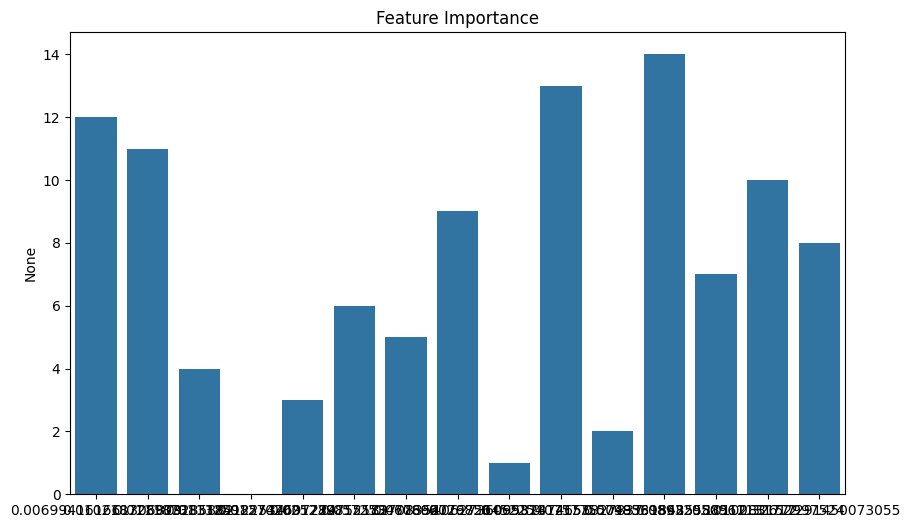

In [2]:
feature_importance = clf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.show()
